**Project description**


You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans is more profitable in order to adjust the advertising budget.


You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze clients' behavior and determine which prepaid plan is more profitable.

**Initialize the Datasets for Megaline Data**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from scipy import stats as st
%matplotlib inline

path = '/datasets/'
path1 = path + 'megaline_calls.csv'
path2 = path + 'megaline_internet.csv'
path3 = path + 'megaline_messages.csv'
path4 = path + 'megaline_plans.csv'
path5 = path +  'megaline_users.csv'

df_calls = pd.read_csv(path1 ,sep=',')
df_internet = pd.read_csv(path2,sep=',')
df_messages = pd.read_csv(path3,sep=',')
df_plans = pd.read_csv(path4,sep=',')
df_users = pd.read_csv(path5,sep=',')

In [56]:
df_calls.info()
df_calls.count()
#df_calls.head(),df_calls.tail()
display(df_calls.head(),df_calls.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null datetime64[ns]
duration     137735 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


,id,user_id,call_date,duration
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37
137734,1499_203,1499,2018-12-29,13.86


df_calls Dataset, All looks good except the "call_date" which is an object. I will convert it to date-time format.
This dataset provides the calls and duration of each call for users (user_id).

In [5]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls['call_date'].dt.month
df_calls['call_date'].dt.year

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
137730    2018
137731    2018
137732    2018
137733    2018
137734    2018
Name: call_date, Length: 137735, dtype: int64

In [6]:
df_internet.info()
df_internet.count()
df_internet.head(),df_internet.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


(         id  user_id session_date  mb_used
 0   1000_13     1000   2018-12-29    89.86
 1  1000_204     1000   2018-12-31     0.00
 2  1000_379     1000   2018-12-28   660.40
 3  1000_413     1000   2018-12-26   270.99
 4  1000_442     1000   2018-12-27   880.22,
               id  user_id session_date  mb_used
 104820  1499_215     1499   2018-10-20   218.06
 104821  1499_216     1499   2018-12-30   304.72
 104822  1499_217     1499   2018-09-22   292.75
 104823  1499_218     1499   2018-12-07     0.00
 104824  1499_219     1499   2018-12-24   758.31)

In [7]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])

df_internet dataset for internet usage (data usage). This dataset provides the data usage by a user (user-id) for each date. Changed the session_date to date_time format.

In [8]:
df_messages.info()
df_messages.count()
df_messages.head(),df_messages.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


(         id  user_id message_date
 0  1000_125     1000   2018-12-27
 1  1000_160     1000   2018-12-31
 2  1000_223     1000   2018-12-31
 3  1000_251     1000   2018-12-27
 4  1000_255     1000   2018-12-26,
              id  user_id message_date
 76046  1497_526     1497   2018-12-24
 76047  1497_536     1497   2018-12-24
 76048  1497_547     1497   2018-12-31
 76049  1497_558     1497   2018-12-24
 76050  1497_613     1497   2018-12-23)

In [9]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])

df_messages dataset depicts messages activity for each user (user-id), converted message_date to date_time format.

In [10]:
df_plans.info()
df_plans.count()
df_plans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


df_plans dataset depicts the two different plans (surf, ultimate) with plan features: plan rate per month, number of messages included, data per month, minutes per month, data charge per gb (beyond included data), charge per message (beyond included messages), charge per minute (beyond included minutes).

Data included is in mb, data rate charge for extra data used is per gb.

In [11]:
df_users.info()
df_users.count()
df_users.head(),df_users.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


(   user_id first_name  last_name  age                                   city  \
 0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
 1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
 2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
 3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
 4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   
 
      reg_date      plan churn_date  
 0  2018-12-24  ultimate        NaN  
 1  2018-08-13      surf        NaN  
 2  2018-10-21      surf        NaN  
 3  2018-01-28      surf        NaN  
 4  2018-05-23      surf        NaN  ,
      user_id first_name   last_name  age  \
 495     1495      Fidel      Sharpe   67   
 496     1496      Ariel    Shepherd   49   
 497     1497      Donte     Barrera   49   
 498     1498       Scot  Williamson   51   
 499     1499      Shena     Dickson   37   
 
           

df_users dataset. Shows user-id, name, age, city, date of plan, plan type (surf or ultimate) and churn date. 500 users starting with id 1000, last id 1499.

In [12]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])
df_users.set_index('user_id')

,first_name,last_name,age,city,reg_date,plan,churn_date
user_id,,,,,,,
1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
...,...,...,...,...,...,...,...
1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT
1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT
1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT


Index df_users on user_id, changed date_time column to date_time format.

For each user, find:
The number of calls made and minutes used per month


In [13]:
call_stat = df_calls.pivot_table(index='user_id',values='duration',aggfunc=['count','sum'])
call_stat.columns=['call_count','minutes']

call_stat

,call_count,minutes
user_id,,
1000,16,116.83
1001,261,1640.46
1002,113,777.13
1003,149,1041.00
1004,370,2618.95
...,...,...
1495,253,1666.41
1496,195,1376.21
1497,54,276.53


**CONCLUSION**

The above pivot table displays number of calls made and minutes used each month. 481 rows imply we have call info on 481 users. Missing info on 19 users since total users is 500.

In [14]:
calls_with_zero_minutes = df_calls[df_calls['duration']==0]
calls_with_zero_minutes

,id,user_id,call_date,duration
19,1001_4,1001,2018-12-05,0.0
25,1001_13,1001,2018-12-24,0.0
31,1001_30,1001,2018-10-17,0.0
32,1001_31,1001,2018-11-03,0.0
34,1001_35,1001,2018-12-21,0.0
...,...,...,...,...
137714,1499_183,1499,2018-11-10,0.0
137715,1499_184,1499,2018-09-15,0.0
137720,1499_189,1499,2018-12-27,0.0
137722,1499_191,1499,2018-12-24,0.0


**CONCLUSION**

The charge is on the number of minutes used for calls and not on number of calls. There are 26834 calls with zero minutes, but that doesn't impact the total charge. Hence I will leave the data in the system and not remove it. 

For each user, find:
The number of text messages sent per month

In [15]:
messages_stat = df_messages.pivot_table(index='user_id',aggfunc=['size'])
messages_stat.columns=['msg_count']
messages_stat

,msg_count
user_id,
1000,11
1001,207
1002,88
1003,50
1004,177
...,...
1491,409
1492,108
1494,174


**CONCLUSION**

The above table depicts user-id and number of messages sent per user_id. Message data available for 402 users. 98 users have message data missing, since total users is 500.

The data_mb of data per month

In [16]:
internet_stat = df_internet.pivot_table(index='user_id',values='mb_used',aggfunc=['sum'])
internet_stat.columns=['data_mb']
internet_stat

,data_mb
user_id,
1000,1901.47
1001,80437.94
1002,40293.33
1003,27044.14
1004,156352.81
...,...
1495,98890.96
1496,64268.64
1497,11106.55


**CONCLUSION**

The above pivot_table displays the data used per month by internet users. Internet data available for 489 users, and is missing for 11 users since total 500 users.

The monthly profit from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)



In [17]:
# Merge User data with calls data stats
df_users['NYNJ'] = df_users['city'].str.contains('NY-NJ')
data_combined =df_users[['user_id','plan','NYNJ']].copy()

data_combined = pd.merge(data_combined,call_stat,'left',on='user_id')
data_combined['NYNJ'].value_counts(),df_users['city'].value_counts()

(False    420
 True      80
 Name: NYNJ, dtype: int64,
 New York-Newark-Jersey City, NY-NJ-PA MSA          80
 Los Angeles-Long Beach-Anaheim, CA MSA             29
 Dallas-Fort Worth-Arlington, TX MSA                21
 Chicago-Naperville-Elgin, IL-IN-WI MSA             19
 Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    17
                                                    ..
 Greensboro-High Point, NC MSA                       1
 Raleigh-Cary, NC MSA                                1
 Stockton, CA MSA                                    1
 Oxnard-Thousand Oaks-Ventura, CA MSA                1
 Jacksonville, FL MSA                                1
 Name: city, Length: 73, dtype: int64)

Created a new column in df_users for NYNJ users (to be used later).
This column will be True, if the user is NYNJ user, False otherwise
We have 80 NYNJ users, 420 other

Merging user data (df_users_ with call_stat (pivot_table) data based on user_id. Combined dataset is data_combined.


In [18]:
# Merge user data with internet data
print(data_combined['user_id'].isin(df_internet['user_id']).value_counts())

data_combined = pd.merge(data_combined,internet_stat,'left',on='user_id')
data_combined

True     489
False     11
Name: user_id, dtype: int64


,user_id,plan,NYNJ,call_count,minutes,data_mb
0,1000,ultimate,False,16.0,116.83,1901.47
1,1001,surf,False,261.0,1640.46,80437.94
2,1002,surf,False,113.0,777.13,40293.33
3,1003,surf,False,149.0,1041.00,27044.14
4,1004,surf,False,370.0,2618.95,156352.81
...,...,...,...,...,...,...
495,1495,surf,True,253.0,1666.41,98890.96
496,1496,surf,False,195.0,1376.21,64268.64
497,1497,ultimate,False,54.0,276.53,11106.55
498,1498,surf,True,451.0,3029.97,227525.13


Merging dataset data_combined with internet_stat (pivot_table) data based on user_id. Combined dataset is data_combined.
11 users have no internet data. 489 users have internet data.

In [19]:
# Merge user data with txtmsg data
print(data_combined['user_id'].isin(df_messages['user_id']).value_counts())

data_combined = pd.merge(data_combined,messages_stat,'left',on='user_id')
data_combined

True     402
False     98
Name: user_id, dtype: int64


,user_id,plan,NYNJ,call_count,minutes,data_mb,msg_count
0,1000,ultimate,False,16.0,116.83,1901.47,11.0
1,1001,surf,False,261.0,1640.46,80437.94,207.0
2,1002,surf,False,113.0,777.13,40293.33,88.0
3,1003,surf,False,149.0,1041.00,27044.14,50.0
4,1004,surf,False,370.0,2618.95,156352.81,177.0
...,...,...,...,...,...,...,...
495,1495,surf,True,253.0,1666.41,98890.96,NaN
496,1496,surf,False,195.0,1376.21,64268.64,65.0
497,1497,ultimate,False,54.0,276.53,11106.55,50.0
498,1498,surf,True,451.0,3029.97,227525.13,NaN


Merging dataset data_combined with messages_stat (pivot_table) data based on user_id. Combined dataset is data_combined.
98 users have no message data. 402 users have message data.

In [20]:
value_maps={'call_count':0,'minutes':0,'data_mb':0,'msg_count':0}
data_combined.fillna(value_maps,inplace=True)

Filled NaN values for missing data with 0. Since we merged the different datasets, and the stats had missing data, we need to replace the NaN values with 0s for processing and analysis.

In [21]:
# Merge user data with txtmsg data
print(data_combined['plan'].isin(df_plans['plan_name']).value_counts())

data_combined = pd.merge(data_combined,df_plans,how='left',left_on='plan',right_on='plan_name')
data_combined

True    500
Name: plan, dtype: int64


,user_id,plan,NYNJ,call_count,minutes,data_mb,msg_count,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,ultimate,False,16.0,116.83,1901.47,11.0,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,surf,False,261.0,1640.46,80437.94,207.0,50,15360,500,20,10,0.03,0.03,surf
2,1002,surf,False,113.0,777.13,40293.33,88.0,50,15360,500,20,10,0.03,0.03,surf
3,1003,surf,False,149.0,1041.00,27044.14,50.0,50,15360,500,20,10,0.03,0.03,surf
4,1004,surf,False,370.0,2618.95,156352.81,177.0,50,15360,500,20,10,0.03,0.03,surf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,surf,True,253.0,1666.41,98890.96,0.0,50,15360,500,20,10,0.03,0.03,surf
496,1496,surf,False,195.0,1376.21,64268.64,65.0,50,15360,500,20,10,0.03,0.03,surf
497,1497,ultimate,False,54.0,276.53,11106.55,50.0,1000,30720,3000,70,7,0.01,0.01,ultimate
498,1498,surf,True,451.0,3029.97,227525.13,0.0,50,15360,500,20,10,0.03,0.03,surf


**CONCLUSION**

Combined the dataset data_combined with the plan_name and plan info for each user using df_plans dataset. Now we can see details of plan for each user.

**The monthly profit from each user**


  (subtract the free package limit from the total number of calls, 
  text messages, and data; 
  multiply the result by the calling plan value; 
  add the monthly charge depending on the calling plan)

  messages_included	mb_per_month_included	minutes_included	


  usd_monthly_pay	usd_per_gb	usd_per_message	usd_per_minute	plan_name


0	50	15360	500	20	10	0.03	0.03	surf


1	1000	30720	3000	70	7	0.01	0.01	ultimate

In [22]:
#Get extra minutes, extra_data_mb, extra_msg_count

data_combined['extra_minutes'] = data_combined['minutes']-data_combined['minutes_included']
data_combined['extra_data_mb'] = data_combined['data_mb']  - data_combined['mb_per_month_included']
data_combined['extra_msg_count'] = data_combined['msg_count'] - data_combined['messages_included']

#replace the columns with no extra values to 0
num = data_combined._get_numeric_data()
num[num < 0] = 0

#calculate profit, caution: data rate is per gb, data_mb was in mbs, so divided by 1000
data_combined['profit'] = data_combined['usd_monthly_pay'] + \
                        data_combined['extra_minutes'] * data_combined['usd_per_minute'] + \
                        data_combined['extra_msg_count'] * data_combined['usd_per_message']  + \
                        (data_combined['extra_data_mb'] * data_combined['usd_per_gb'])/1000
data_combined

,user_id,plan,NYNJ,call_count,minutes,data_mb,msg_count,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,extra_minutes,extra_data_mb,extra_msg_count,profit
0,1000,ultimate,False,16.0,116.83,1901.47,11.0,1000,30720,3000,70,7,0.01,0.01,ultimate,0.00,0.00,0.0,70.0000
1,1001,surf,False,261.0,1640.46,80437.94,207.0,50,15360,500,20,10,0.03,0.03,surf,1140.46,65077.94,157.0,709.7032
2,1002,surf,False,113.0,777.13,40293.33,88.0,50,15360,500,20,10,0.03,0.03,surf,277.13,24933.33,38.0,278.7872
3,1003,surf,False,149.0,1041.00,27044.14,50.0,50,15360,500,20,10,0.03,0.03,surf,541.00,11684.14,0.0,153.0714
4,1004,surf,False,370.0,2618.95,156352.81,177.0,50,15360,500,20,10,0.03,0.03,surf,2118.95,140992.81,127.0,1497.3066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,surf,True,253.0,1666.41,98890.96,0.0,50,15360,500,20,10,0.03,0.03,surf,1166.41,83530.96,0.0,890.3019
496,1496,surf,False,195.0,1376.21,64268.64,65.0,50,15360,500,20,10,0.03,0.03,surf,876.21,48908.64,15.0,535.8227
497,1497,ultimate,False,54.0,276.53,11106.55,50.0,1000,30720,3000,70,7,0.01,0.01,ultimate,0.00,0.00,0.0,70.0000
498,1498,surf,True,451.0,3029.97,227525.13,0.0,50,15360,500,20,10,0.03,0.03,surf,2529.97,212165.13,0.0,2217.5504


Calculation of extra data, messages, minutes used by each user, then used it to calculate total charges per user. 


Note: The data usage included is in mb, data usage charge is per gb, so divided by 1000 to calculate charges per gb.

**# PLAN Usage (within plan limits, extra usage)**

Calculating users who stay within the plan, and who have usage beyond the plan included limits.



In [23]:
within_plan_users = data_combined[data_combined['usd_monthly_pay']==data_combined['profit']]
extra_usage_users = data_combined[data_combined['usd_monthly_pay']<data_combined['profit']]
within_plan_users, extra_usage_users

(     user_id      plan   NYNJ  call_count  minutes   data_mb  msg_count  \
 0       1000  ultimate  False        16.0   116.83   1901.47       11.0   
 13      1013  ultimate  False        35.0   203.37  20113.92       16.0   
 21      1021      surf  False        52.0   378.27   6084.63        0.0   
 25      1025  ultimate  False         0.0     0.00      0.00        0.0   
 26      1026  ultimate  False        57.0   335.64  13224.46       22.0   
 ..       ...       ...    ...         ...      ...       ...        ...   
 473     1473      surf  False         0.0     0.00      0.00        0.0   
 481     1481      surf  False         6.0    33.19   1265.78        3.0   
 482     1482  ultimate   True       120.0   786.62  20806.13       94.0   
 487     1487  ultimate  False        56.0   392.71  13992.39       66.0   
 497     1497  ultimate  False        54.0   276.53  11106.55       50.0   
 
      messages_included  mb_per_month_included  minutes_included  \
 0                

**CONCLUSION**

We have 73 users who are using the plan within limits of minutes, messages, and data.
All other 427 users are exceeding usage in minutes/messages/data or a combination of them. 

** Users who are paying beyond 1000USD per month **

In [24]:
extreme_users= data_combined[data_combined['profit']>1000]
extreme_users = extreme_users.sort_values(by=['profit'],ascending=False)
extreme_stats = extreme_users.pivot_table(index=['plan'],values='profit',aggfunc=['sum','mean','count'])
extreme_users, extreme_stats

(     user_id      plan   NYNJ  call_count  minutes    data_mb  msg_count  \
 268     1268      surf  False       690.0  4773.52  312518.64      300.0   
 359     1359      surf  False       654.0  4552.42  306503.85        0.0   
 147     1147      surf  False       876.0  5822.43  257374.65      203.0   
 28      1028  ultimate  False        73.0   488.46  390159.35      756.0   
 240     1240      surf  False      1022.0  6610.85  241510.24       77.0   
 ..       ...       ...    ...         ...      ...        ...        ...   
 68      1068      surf   True       248.0  1716.60  113393.52        0.0   
 131     1131      surf  False         0.0     0.00  115737.76      216.0   
 60      1060      surf  False       440.0  3007.15  107380.33      330.0   
 466     1466      surf  False       216.0  1355.52  111087.86      320.0   
 332     1332      surf  False       215.0  1363.13  111476.81       10.0   
 
      messages_included  mb_per_month_included  minutes_included  \
 268  

**Surf users who are paying beyond Ultimate plan users**

In [25]:
extra_surf_users = data_combined[(data_combined['usd_monthly_pay']==20) & (data_combined['profit'] > 70 )]
extra_surf_users

,user_id,plan,NYNJ,call_count,minutes,data_mb,msg_count,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,extra_minutes,extra_data_mb,extra_msg_count,profit
1,1001,surf,False,261.0,1640.46,80437.94,207.0,50,15360,500,20,10,0.03,0.03,surf,1140.46,65077.94,157.0,709.7032
2,1002,surf,False,113.0,777.13,40293.33,88.0,50,15360,500,20,10,0.03,0.03,surf,277.13,24933.33,38.0,278.7872
3,1003,surf,False,149.0,1041.00,27044.14,50.0,50,15360,500,20,10,0.03,0.03,surf,541.00,11684.14,0.0,153.0714
4,1004,surf,False,370.0,2618.95,156352.81,177.0,50,15360,500,20,10,0.03,0.03,surf,2118.95,140992.81,127.0,1497.3066
7,1007,surf,False,380.0,2484.15,143852.74,255.0,50,15360,500,20,10,0.03,0.03,surf,1984.15,128492.74,205.0,1370.6019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,1494,surf,True,420.0,2672.66,91389.19,174.0,50,15360,500,20,10,0.03,0.03,surf,2172.66,76029.19,124.0,849.1917
495,1495,surf,True,253.0,1666.41,98890.96,0.0,50,15360,500,20,10,0.03,0.03,surf,1166.41,83530.96,0.0,890.3019
496,1496,surf,False,195.0,1376.21,64268.64,65.0,50,15360,500,20,10,0.03,0.03,surf,876.21,48908.64,15.0,535.8227
498,1498,surf,True,451.0,3029.97,227525.13,0.0,50,15360,500,20,10,0.03,0.03,surf,2529.97,212165.13,0.0,2217.5504


**Conclusion**
There are 275 surf plan users who are using the data above their above 20USD and also the ultimate plan 70USD limit. These users can be offered a the 70USD fixed month plan or a higher plan.

**Step 3. Analyze the data**
Describe the customers' behavior. Find the minutes, texts, and data_mb of data the users of each plan require per month. Calculate the mean, dispersion, and standard deviation. Plot histograms. Describe the distributions.

In [26]:
data_combined_stats = data_combined.pivot_table(index='plan',values=['minutes','data_mb','msg_count','profit'],aggfunc=['sum','mean','size'])
data_combined_stats.columns=['total_data_mb', 'total_minutes', 'total_msg_count', 'total_profit', 'mean_data_mb', 'mean_minutes', 'mean_msg_count', 'mean_profit','total_users']
data_combined_stats

,total_data_mb,total_minutes,total_msg_count,total_profit,mean_data_mb,mean_minutes,mean_msg_count,mean_profit,total_users
plan,,,,,,,,,
surf,26046179.93,636691.24,49014.0,234259.40780,76832.389174,1878.145251,144.584071,691.030701,339
ultimate,12394583.78,292459.02,27037.0,68925.62597,76984.992422,1816.515652,167.931677,428.109478,161


**CONCLUSION**
bold textPivot table depicts total and mean data, minutes, messages, profit for Surf and Combined users. Mean profit for surf users seems to be much higher than ultimate plan users. However, Surf plan also has 339 users vs 161 users of ultimate plan.

In [27]:
data_surf_all = data_combined[data_combined['plan']=='surf']
data_ultimate_all = data_combined[data_combined['plan']=='ultimate']
data_surf_all, data_ultimate_all

(     user_id  plan   NYNJ  call_count  minutes    data_mb  msg_count  \
 1       1001  surf  False       261.0  1640.46   80437.94      207.0   
 2       1002  surf  False       113.0   777.13   40293.33       88.0   
 3       1003  surf  False       149.0  1041.00   27044.14       50.0   
 4       1004  surf  False       370.0  2618.95  156352.81      177.0   
 5       1005  surf  False        59.0   470.22   17140.17       11.0   
 ..       ...   ...    ...         ...      ...        ...        ...   
 494     1494  surf   True       420.0  2672.66   91389.19      174.0   
 495     1495  surf   True       253.0  1666.41   98890.96        0.0   
 496     1496  surf  False       195.0  1376.21   64268.64       65.0   
 498     1498  surf   True       451.0  3029.97  227525.13        0.0   
 499     1499  surf  False       204.0  1450.31   71350.23        0.0   
 
      messages_included  mb_per_month_included  minutes_included  \
 1                   50                  15360        

Separated surf and ultimate users into different data sets (df_surf_all, df_ultimate_all)

**Statistical Data Analysis**
Calculate the mean, dispersion, and standard deviation. Plot histograms. Describe the distributions.

In [28]:
data_surf = data_surf_all[['minutes','data_mb','msg_count','profit']]

data_ultimate = data_ultimate_all[['minutes','data_mb','msg_count','profit']]
data_surf, data_ultimate

(     minutes    data_mb  msg_count     profit
 1    1640.46   80437.94      207.0   709.7032
 2     777.13   40293.33       88.0   278.7872
 3    1041.00   27044.14       50.0   153.0714
 4    2618.95  156352.81      177.0  1497.3066
 5     470.22   17140.17       11.0    37.8017
 ..       ...        ...        ...        ...
 494  2672.66   91389.19      174.0   849.1917
 495  1666.41   98890.96        0.0   890.3019
 496  1376.21   64268.64       65.0   535.8227
 498  3029.97  227525.13        0.0  2217.5504
 499  1450.31   71350.23        0.0   608.4116
 
 [339 rows x 4 columns],
      minutes    data_mb  msg_count      profit
 0     116.83    1901.47       11.0    70.00000
 6      64.11   34187.19      154.0    94.27033
 8    1473.31   55473.04       84.0   243.27128
 11   2744.87  131778.60      371.0   777.41020
 13    203.37   20113.92       16.0    70.00000
 ..       ...        ...        ...         ...
 482   786.62   20806.13       94.0    70.00000
 487   392.71   13992.39 

In [29]:
data_surf.skew()

minutes      1.266250
data_mb      0.967353
msg_count    2.377384
profit       1.006265
dtype: float64

In [30]:
data_ultimate.skew()

minutes      1.299556
data_mb      1.537525
msg_count    1.989396
profit       1.811428
dtype: float64

Skew value is high for minutes and message count in surf users, it is high in minutes, data usage and message count for ultimate users.

In [31]:
#Get IQR for each variable in the dataset
Q1 = data_surf.quantile(0.25)
Q3 = data_surf.quantile(0.75)
IQR = Q3 - Q1
fence_low = Q1 - IQR * 1.5
fence_high = Q3 + IQR * 1.5
print(IQR,fence_low, fence_high)

Q1U = data_ultimate.quantile(0.25)
Q3U = data_ultimate.quantile(0.75)
IQRU = Q3U - Q1U
fence_lowU = Q1U - IQRU * 1.5
fence_highU = Q3U + IQRU * 1.5
print(IQRU,fence_lowU, fence_highU)

minutes       2112.50500
data_mb      88654.57500
msg_count      197.50000
profit         939.71545
dtype: float64 minutes       -2548.682500
data_mb     -104752.937500
msg_count      -285.250000
profit        -1254.655875
dtype: float64 minutes        5901.337500
data_mb      249865.362500
msg_count       504.750000
profit         2504.205925
dtype: float64
minutes       2017.80000
data_mb      81563.72000
msg_count      227.00000
profit         532.75334
dtype: float64 minutes      -2396.12000
data_mb     -97302.92000
msg_count     -323.50000
profit        -729.13001
dtype: float64 minutes        5675.08000
data_mb      228951.96000
msg_count       584.50000
profit         1401.88335
dtype: float64


In [32]:
def check_outlier(df_in, col_name,f_low,f_high):

 #   df_out = df_in.loc[(df_in[col_name] >= f_low) & (df_in[col_name] <= f_high)]
    df_outliers = df_in[(df_in[col_name] < f_low) | (df_in[col_name] > f_high)]
    
    print('Outliers '+ col_name, ' :', len(df_outliers))
    print(len(df_outliers))
    df_out = df_in  # I decided not to remove outliers since we have only 500 records
    return df_out

data_surf = check_outlier(data_surf,'data_mb',fence_low['data_mb'],fence_high['data_mb'])
data_surf = check_outlier(data_surf,'msg_count',fence_low['msg_count'],fence_high['msg_count'])
data_surf = check_outlier(data_surf,'minutes',fence_low['minutes'],fence_high['minutes'])

data_ultimate = check_outlier(data_ultimate,'data_mb',fence_lowU['data_mb'],fence_highU['data_mb'])
data_ultimate = check_outlier(data_ultimate,'msg_count',fence_lowU['msg_count'],fence_highU['msg_count'])
data_ultimate = check_outlier(data_ultimate,'minutes',fence_lowU['minutes'],fence_highU['minutes'])

Outliers data_mb  : 3
3
Outliers msg_count  : 17
17
Outliers minutes  : 8
8
Outliers data_mb  : 5
5
Outliers msg_count  : 6
6
Outliers minutes  : 6
6


I decided not to remove outliers since we have only 500 records. There are 45 outlier records. I decided to keep them because in a mobile calling plan, we will always have few extensive users of the plans.

In [33]:
#SDA for surf users

data_surf_stats = pd.DataFrame([data_surf.median(),data_surf.mean(), data_surf.std(), 
                                data_surf.var(),data_surf.mean() - 2* data_surf.var(),data_surf.mean() + 2* data_surf.var()], 
                               index=['Median_surf','Mean_surf','STD_surf', 'Var_surf','range95Lo','range95Hi'])

#SDA for ultimate users (used different methods just to learn how we can do in different ways)
data_ultimate_stats = pd.DataFrame()
data_ultimate_stats['Median_ultimate']  = data_ultimate.median()
data_ultimate_stats['Mean_ultimate']  = data_ultimate.mean()
#Standard Deviation of surf
data_ultimate_stats['STD_ultimate'] = data_ultimate.std()
#Variance of ultimate 
data_ultimate_stats['Var_ultimate'] = data_ultimate.var()
data_ultimate_stats['range95Lo'] = data_ultimate_stats['Mean_ultimate'] - 2 * data_ultimate_stats['STD_ultimate']
data_ultimate_stats['range95Hi'] = data_ultimate_stats['Mean_ultimate'] + 2 * data_ultimate_stats['STD_ultimate']
data_ultimate_stats = data_ultimate_stats.T #Transposing the ultimate stats so that mean, median, surf, var etc shown on left.

#Concatenate SDA stats for surf and ultimate users
data_all_stats = pd.concat([data_surf_stats,data_ultimate_stats])
data_all_stats

,minutes,data_mb,msg_count,profit
Median_surf,1.413010e+03,6.216801e+04,81.000000,516.543700
Mean_surf,1.878145e+03,7.683239e+04,144.584071,691.030701
STD_surf,1.628815e+03,6.016594e+04,182.593936,627.812568
Var_surf,2.653038e+06,3.619940e+09,33340.545426,394148.620451
range95Lo,-5.304199e+06,-7.239803e+09,-66536.506781,-787606.210201
range95Hi,5.307955e+06,7.239956e+09,66825.674923,788988.271604
Median_ultimate,1.279240e+03,5.858160e+04,96.000000,265.031200
Mean_ultimate,1.816516e+03,7.698499e+04,167.931677,428.109478
STD_ultimate,1.610143e+03,6.685827e+04,198.523145,443.396755
Var_ultimate,2.592559e+06,4.470028e+09,39411.439053,196600.682672


**CONCLUSION**

The above values for Median, Mean, Standard Deviation and Variance (Dispersion) show that the Mean is higher than the Median for Minutes used, Data used, Messages used and Profit.
This implies that the distribution  is skewed to the right (that is, bunched up toward the left and with a "tail" stretching toward the right).
It is not a symmetrical distribution because in a symmetrical distribution, mean and median are same.

For skewed distributions, the standard deviation will not give information on the asymmetry.

It is better to use the first and third quartiles4, since these will give some sense of the asymmetry of the distribution. This will also become clearer in the histogram and density plots below.

The range95Hi, range95Lo show the 2*sigma range = 95% fall within 2 Standard Deviations. (u +- 2 * sigma).

The 95% range shows the negative values for the low range (range95Lo). 
Since the negative values for minutes, data, message count is not possible, all those values will cause the right skew.

**Heatmap**

Heatmap to see correlation between profit and minutes, messages, data used for surf and ultimate plan users.

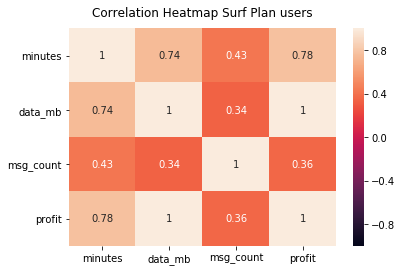

In [34]:
heatmap = sns.heatmap(data_surf.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap Surf Plan users', fontdict={'fontsize':12}, pad=12);

<div style="border:solid green 4px; padding: 20px">Beautiful!</div>

In [35]:
data_surf.corr().unstack().sort_values().drop_duplicates()

data_mb    msg_count    0.340066
msg_count  profit       0.360584
minutes    msg_count    0.426545
           data_mb      0.742279
           profit       0.775631
data_mb    profit       0.997223
minutes    minutes      1.000000
dtype: float64

The Surf Plan users heatmap depicts that the Profit is strongly related with Minutes, Data_mb. Total number of messages is slightly less correlated with profits.

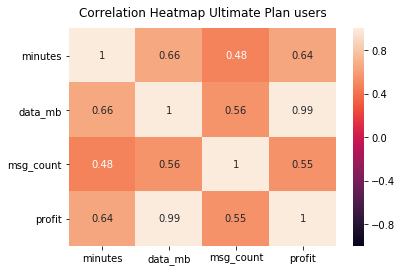

In [36]:
heatmap = sns.heatmap(data_ultimate.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap Ultimate Plan users', fontdict={'fontsize':12}, pad=12);

In [37]:
data_ultimate.corr().unstack().sort_values().drop_duplicates()

minutes    msg_count    0.482516
msg_count  profit       0.553785
data_mb    msg_count    0.561852
minutes    profit       0.641107
           data_mb      0.656433
data_mb    profit       0.993229
minutes    minutes      1.000000
dtype: float64

The Ultimate Plan users heatmap depicts that the Profit is strongly related with Minutes, Data_mb. Total number of messages also is has an impact on profits (lesser extent than minutes and data).

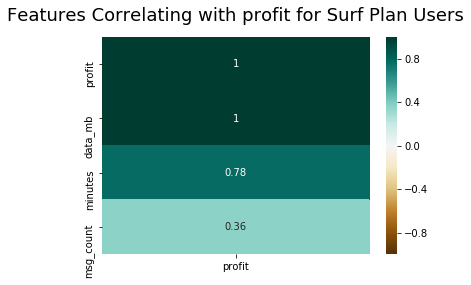

In [38]:
#plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data_surf.corr()[['profit']].sort_values(by='profit', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with profit for Surf Plan Users', fontdict={'fontsize':18}, pad=16);

The Surf plan users result in profit with strong correlation of data used, minutes used and messages. Maybe the plan should decrease the total number of free messages offered in the plan to increase the profits on messages.
The plan may also want to increase the cost for more data and more minutes.

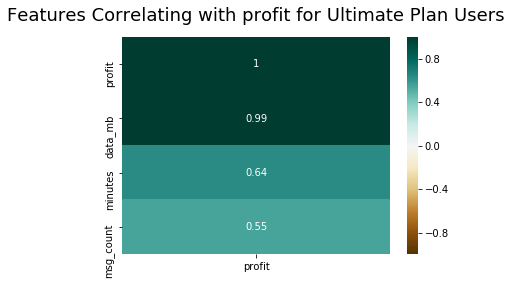

In [39]:
heatmap = sns.heatmap(data_ultimate.corr()[['profit']].sort_values(by='profit', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with profit for Ultimate Plan Users', fontdict={'fontsize':18}, pad=16);

The Ultimate plan users result in profit with strong correlation of data used, minutes used and messages.  Maybe the plan should decrease the total number of free messages offered in the plan to increase the profits on messages.
The plan may also want to increase the cost for more data and more minutes.

**Distplots and Histograms**

Histograms for Surf and Ultimate Plan users

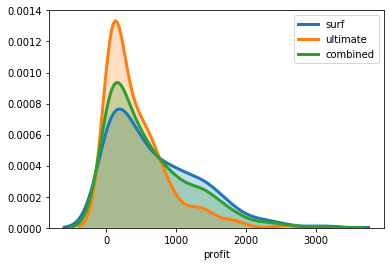

In [40]:
#Histograms for both plans (surf, ultimate)

sns.distplot(data_surf['profit'], hist = False,kde = True,kde_kws = {'shade': True, 'linewidth': 3},label = 'surf')
sns.distplot(data_ultimate['profit'], hist = False,kde = True,kde_kws = {'shade': True, 'linewidth': 3},label = 'ultimate')
sns.distplot(data_combined['profit'], hist = False,kde = True,kde_kws = {'shade': True, 'linewidth': 3},label = 'combined')

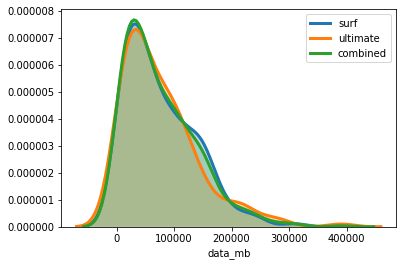

In [41]:
sns.distplot(data_surf['data_mb'], hist = False,kde = True,kde_kws = {'shade': True, 'linewidth': 3},label = 'surf')
sns.distplot(data_ultimate['data_mb'], hist = False,kde = True,kde_kws = {'shade': True, 'linewidth': 3},label = 'ultimate')
sns.distplot(data_combined['data_mb'], hist = False,kde = True,kde_kws = {'shade': True, 'linewidth': 3},label = 'combined')

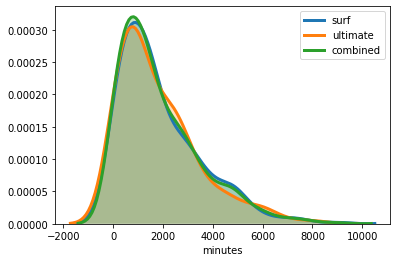

In [42]:
sns.distplot(data_surf['minutes'], hist = False,kde = True,kde_kws = {'shade': True, 'linewidth': 3},label = 'surf')
sns.distplot(data_ultimate['minutes'], hist = False,kde = True,kde_kws = {'shade': True, 'linewidth': 3},label = 'ultimate')
sns.distplot(data_combined['minutes'], hist = False,kde = True,kde_kws = {'shade': True, 'linewidth': 3},label = 'combined')

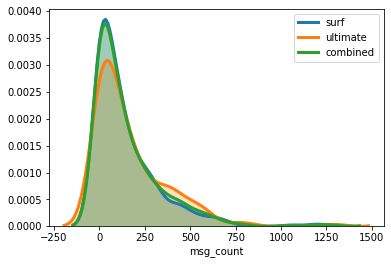

In [43]:
sns.distplot(data_surf['msg_count'], hist = False,kde = True,kde_kws = {'shade': True, 'linewidth': 3},label = 'surf')
sns.distplot(data_ultimate['msg_count'], hist = False,kde = True,kde_kws = {'shade': True, 'linewidth': 3},label = 'ultimate')
sns.distplot(data_combined['msg_count'], hist = False,kde = True,kde_kws = {'shade': True, 'linewidth': 3},label = 'combined')

**CONCLUSION**

The above distplots display distribution of minutes, data used, messages, and profit against the density distribution. All plots are skewed to the right as we had inferred from the values of mean, median, STD and 95% fall within 2sigmas. 

Since the Mobile plan data that has a lower bound (it cannot be less than zero), the maps is skewed to the right. The lowerbound is zero (0) in this plan information. The mobile plan information generates positive data only. 

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


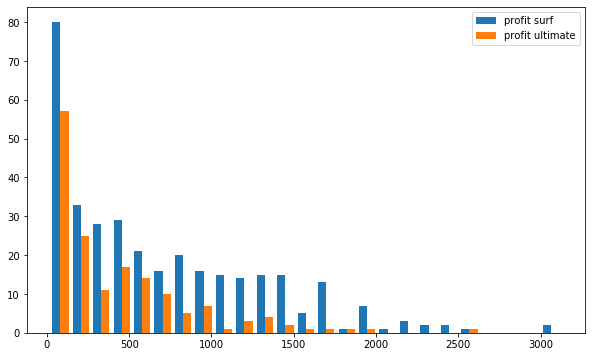

In [44]:
fig = plt.figure(figsize=(10,6)) 
ax = fig.add_subplot()
col='profit'
ax.hist([data_surf[col], data_ultimate[col]], label=( col + ' surf',  col + ' ultimate'), bins=25)
ax.legend();

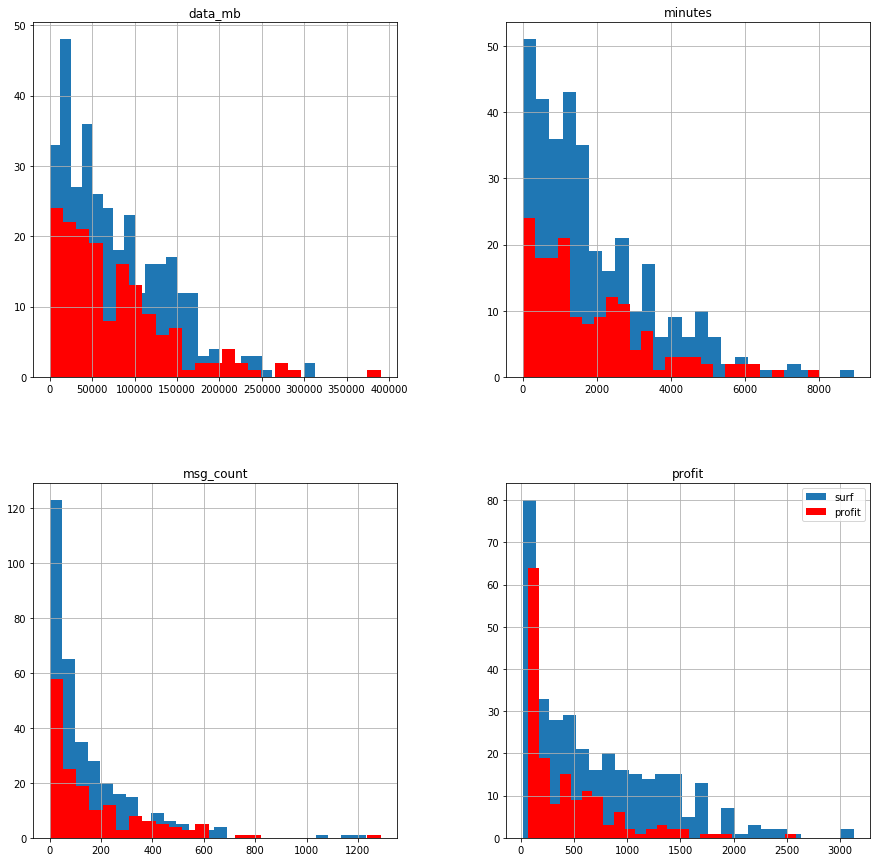

In [45]:
df1 = data_surf

length=4
axes = data_surf.hist(  figsize=(15,15),bins=25, label='surf')
data_ultimate.hist(ax=axes.ravel()[:length], figsize=(15,15), bins=25, label='profit',color='r')
plt.legend();


**CONCLUSION**

All the histograms were drawn for both Surf Plan and Ultimate Plan users. All histograms show skewness to the right. This implies that most of the users used fewer minutes, data, and messages. Only a few users used a lot of data, minutes, and messages. 
In my opinion, right skew of the data is a correct representation of the Calling plan.
We always will have a few people who will use the calling plan minutes, messages and text a lot. Maybe they travel a lot, or are studying abroad and use the mobile plan extensively.

**Boxplots**

Boxplots to show the values above the Interquartile range

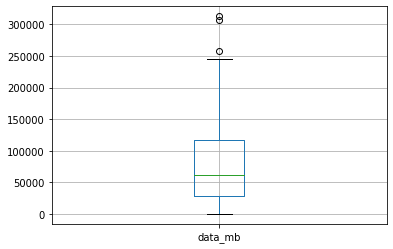

In [46]:
data_surf[['data_mb']].boxplot();

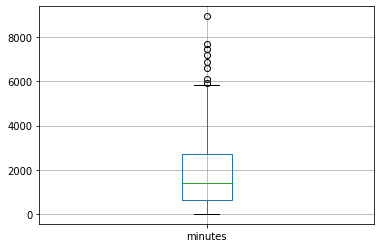

In [47]:
data_surf[['minutes']].boxplot();

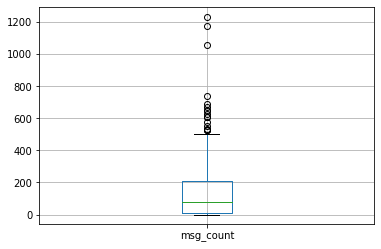

In [48]:
data_surf[['msg_count']].boxplot()

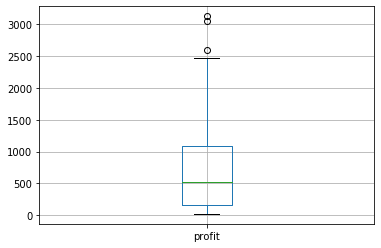

In [49]:
data_surf[['profit']].boxplot()

**CONCLUSION**

The box plots show a good number of values above the whiskers. These resulted in median value to be lower than the mean.
Reasons are obvious - there are a few very heavy users of the plan, and they are resulting in heavy profits. 

**Step 4. Test the hypotheses**

1. The average profit from users of Ultimate and Surf calling plans differs.
2. The average profit from users in NY-NJ area is different from that of the users from other regions.

In [50]:
#Hypthesis 0 (Null Hypothesis)  The average profit from users of Ultimate and Surf calling plans differs.
profit_surf = data_surf[['profit']]
profit_ultimate = data_ultimate[['profit']]

alpha = .05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(
        profit_surf, 
        profit_ultimate,equal_var=False) #equal_var is False because we are considering that the average profit from users of two different plans differs

p_value = results.pvalue
print('p-value: ', p_value)

if (p_value < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  [1.19872148e-07]
We reject the null hypothesis


**CONCLUSION**

As we see in profits, the Ultimate plan and surf plan have different profits.

Hence our null hypothesis - profits from Surf plan and Ultimate plan differ.

In order to test our hypothesis that the means of the two calling plans differ based on samples taken from them, we apply the method scipy.stats.ttest_ind (array1, array2, equal_var).
We pass these parameters to the method:
array1, array2 are arrays containing the samples
equal_var (from equal variance) is an parameter that specifies whether or not the variances of the samples should be considered equal. It’s passed as “equal_var = True” or “equal_var = False” (True means we consider the variances equal, False means we don't).

#As per the results, p_value is less than alpha (0.05). Hence we reject the Null Hypothesis that the profits from Surf plan and Ultimate plan differ.

**Hypthesis 0 (Null Hypothesis)**

The average profit from users in NY-NJ area is different from that of the users from other regions.

In [51]:
#Hypthesis 0 (Null Hypothesis)  The average profit from users in NY-NJ area is different from that of the users from other regions.
profit_NYNJ = data_combined[data_combined['NYNJ']==True]['profit']
profit_NYNJ

14       41.68850
22     1298.23790
24       20.90060
27      833.63810
31      505.06176
          ...    
469     227.50020
482      70.00000
494     849.19170
495     890.30190
498    2217.55040
Name: profit, Length: 80, dtype: float64

In [52]:
profit_others = data_combined[data_combined['NYNJ']==False]['profit']
profit_others

0        70.00000
1       709.70320
2       278.78720
3       153.07140
4      1497.30660
          ...    
492     291.48340
493     389.60901
496     535.82270
497      70.00000
499     608.41160
Name: profit, Length: 420, dtype: float64

In [53]:
mean_NYNJ = profit_NYNJ.mean()
mean_others = profit_others.mean()
print ('mean NYNJ',mean_NYNJ)
print('mean others', mean_others)

mean NYNJ 675.1601605
mean others 593.2671926904761


**CONCLUSION**

My hypothesis for NYNJ users vs others is that NYNJ users lead to a higher profit than all the other users. Hence my null-hypothesis - Profit from NY-NJ area is different from users of other regions.

In [54]:
#Hypthesis 0 (Null Hypothesis)  The average profit from users in NY-NJ area is different from that of the users from other regions.

alpha = .05 # critical statistical significance level
                       
results = st.ttest_ind(
        profit_NYNJ, 
        profit_others,
        equal_var = False)  #False because we are considering that the NY-NJ area residents have different profit from users of other regions

p_value = results.pvalue
print('p-value: ', p_value)

 # if the p-value is less than alpha, we reject the hypothesis
if (p_value < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  0.2705733346912571
We can't reject the null hypothesis


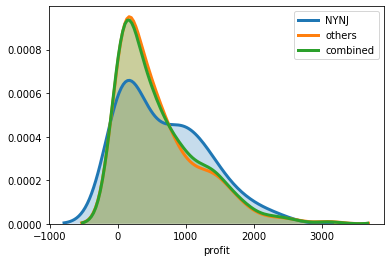

In [55]:
sns.distplot(profit_NYNJ, hist = False,kde = True,kde_kws = {'shade': True, 'linewidth': 3},label = 'NYNJ')
sns.distplot(profit_others, hist = False,kde = True,kde_kws = {'shade': True, 'linewidth': 3},label = 'others')
sns.distplot(data_combined['profit'], hist = False,kde = True,kde_kws = {'shade': True, 'linewidth': 3},label = 'combined')

**CONCLUSION**

p-value is 0.27 and is higher than alpha. Hence we cannot reject the null hypothesis that the NY-NJ area residents have different profit than users from other regions. We also calculated the Mean profit of NYNJ residents vs other areas and found out that NYNJ had a much higher profit (675.16) vs other area (593.26). 


Intuitively, a data distribution with more values to the right of the mean than to the left (as in the distribution pictured above) is said to skew to the right. This is often called positive skew.

# Overall Conclusion

There were two mobile plans to which users could subscribe: Surf and Ultimate
Surf is a 20USD per month plan
Ultimate is a 70USD per month plan, with higher inclusion limits than surf plan

There are 500 users for which the mobile plan data was available - phone calls, call minutes (duration), messages, data used.

There are 339 Surf plan users
There are 161 Ultimate plan users

Some of the mobile usage (eg call data, message data, internet usage data) information was missing for some users. I replaced the missing information with zeros.

Most users (427) went above the plan limits of their mobile plan.

There were 275 Surf plan users who used the plan beyond the Ultimate plan (70USD) limit. 

There are 113 users who are paying more than 1000USD per month for the plan, 
98 of these are surf users, 15 are ultimate plan users.
Their extra usage of data is the main reason for these high costs.

There were around 45 outliers with most (23 - 50 percent) in the message usage. I didn't remove these outliers because it can depict the true situation where most users use the plan within certain ranges but few are very heavy users.

The distributions depicted data was skewed right, with a tail on the right side of the plots. This is expected of a Mobile plan because the lower bound is zero (we cannot have negative usage of minutes, messages or data).


Total and Mean Profit generated by Surf plan users is (USD): 234259.40, 691.030701
Total and Mean Profit generated by Ultimate plan users is (USD): 12394583.78, 428.10


This depicted that Surf plan users generated higher profit than Ultimate plan users. I tested this hypothesis that the two plans differed in the profit generation. The hypothesis failed.

Mean Profit generated by NYNJ users is: 675.16
Mean Profit generated by all others users is: 593.26
This depicted that NYNJ users generated higher profit than non NYNJ users. I tested this hypothesis that the NYNJ users had different profit than other users. The hypothesis can not rejected. Hence we cannot fail the hypothesis that the profit from NYNJ users is different from users of other locations.

Based on the above observations, I would recommend the following:

a. The company introduce a new plan "Infinite plan" for users who are paying above 1000USD per month. The monthly charges for the plan will be much higher than the ultimate plan, but it will give the company a constant stream of revenue.

b The company may also want to recommend to the surf plan users who go beyond the 70USD rate to change plans to "ultimate" or "infinite".

c.The mobile company should also evaluate if the extreme users (> 1000USD per month charge) will be able to pay their bills.

### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [X]  files explored (first rows printed, info() method)
- [x]  clarification of the discovered values provided (call duration 0.0 minutes)
- [X]  data types converted (dates)
- [x]  explanation of which columns had the data types changed and why
- [X]  calculated and displayed: messages used per user
- [X]  calculated and displayed : data used per user
- [X]  calculated and displayed: number of calls and minutes per user
- [X]  calculated and displayed: mean, median, Standard deviation, variance, 95% with 2sigma.
- [x]  the following parameters investigated: messages, data used, minutes used, calling plans, profit
- [x]  biggest profit generators identified
- [X]  histograms, dist plots, box plots for each parameter created
- [X]  Observation and findings based on histogram, distplots and box plots
- [x]  task completed: "the null hypothesis for difference in profit of surf and ultimate plan users"
- [x]  task completed: "the null hypothesis for difference in profit of NYNJ vs other users"
- [x]  task completed: "Which factors have had the biggest influence on the profit generation.
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn and recommendation given

Looking forward to your feedback.